# Viral Propagation in Population

We want to see the difference between a population of party-goers (aka normal deer) and those that do social distancing. 

Changes in this model, compared to the previous model:
Delete:
* No food, because its not relevant 
* No hunger
* No new babies (it's not about that anymore) 
* Essentially stable population that doesn't change

Add: 
* Vector of who is healthy and who is not 
* Start with patient 0 
* Infection based on minimal distance which means that we'll need to calculate person to person distances and have a piece of code similar to current cabbage, except it will be about infecting others. 
```
for every person:
    if infected:
        calculate distances to every other person 
        find all other people that are closer than the threshold
        infect them!     
```
* Output: new cases per tick as a function of time 
* Running the visualization: infected are red
* Parameter to model social distancing (something that turns them solitary if 0, or super mixing together if 1): let's make them wiggle (vx = np.random.rnorm(...) *speed ), and lets change the speed 

In [2]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
import time

In [3]:
##### Define constants, but we do it as a class (to later make passing it around easier)

class Const: #Carefree remote-eating cheaters
    def __init__(self):
        self.n_animals_max = 2000
        self.n_animals_start = 10  #Original n_animals
        self.n_steps = 500
        self.vmin = 0.01
        self.vmax = 5*self.vmin
        self.v_decay = 0.7
        self.arena_size = 3
        
        self.hp_baby = 20
        self.hp_food = 10
        self.hp_reproduction = 50
        self.hp_birthcost = 15        
        self.hp_leak = 0.7
        
        self.food_rate = np.round(1*self.arena_size**2)
        self.eating_distance = 0.1**2       #To avoid running np.sqrt() later
        self.n_food_max = 10000
        self.n_food_start = 200*9
        

In [4]:
#Build the model

def model(c, show_dotses=False, n_trials=1):
    history = np.zeros((c.n_steps, n_trials))

    for i_trial in range(n_trials):
        #Allocate hp for all animals, but only first few are alive
        hp = np.zeros(c.n_animals_max)
        hp[:c.n_animals_start] = np.random.uniform(
            low=c.hp_baby, high=c.hp_reproduction, size=c.n_animals_start)
        
        x = np.random.uniform(low=0, high=c.arena_size, size=c.n_animals_max)
        y = np.random.uniform(low=0, high=c.arena_size, size=c.n_animals_max)
        vx = np.random.uniform(size=c.n_animals_max, low=c.vmin, high=c.vmax)*(
            2*np.random.randint(size=c.n_animals_max,low=0,high=2) - 1)
        vy = np.random.uniform(size=c.n_animals_max, low=c.vmin, high=c.vmax)*(
            2*np.random.randint(size=c.n_animals_max,low=0,high=2) - 1)
         
        n_animals = np.zeros(c.n_steps)

        if show_dotses: #Init plots
            fig = plt.figure(figsize=(3,3))
            ax = plt.subplot(111) #No subplots; just creating axes
            plt.xlim((0,c.arena_size));
            plt.ylim((0,c.arena_size));
            fig.show()
            fig.canvas.draw()

        for t in range(c.n_steps):
            x += vx
            y += vy
            
            vx = vx*c.v_decay + np.random.randn(c.n_animals_max)*c.vmin 
            vy = vy*c.v_decay + np.random.randn(c.n_animals_max)*c.vmin
            #Make them run around (keeps speed somewhat randomized)

            #Reflect from the walls
            vx = np.where(np.logical_or(x>c.arena_size, x<0), -vx , vx)
            vy = np.where(np.logical_or(y>c.arena_size, y<0), -vy , vy)
            x = np.maximum(0,np.minimum(x, c.arena_size)) #Keep them in enclosure
            y = np.maximum(0,np.minimum(y, c.arena_size))
                    
            if show_dotses: #Actual animation
                ax.clear()
                plt.plot(x[hp>0], y[hp>0], 'k.',markersize=5);
                plt.plot(foodx,foody,'r.', markersize=2)
                plt.xlim((0,c.arena_size));
                plt.ylim((0,c.arena_size));
                fig.canvas.draw() #Redraws the canvas (key secret command to animate things)
            else:
                print('.',end='')
        #Time loop is over

        history[:,i_trial] = n_animals
    return np.mean(history, axis=1)

<IPython.core.display.Javascript object>


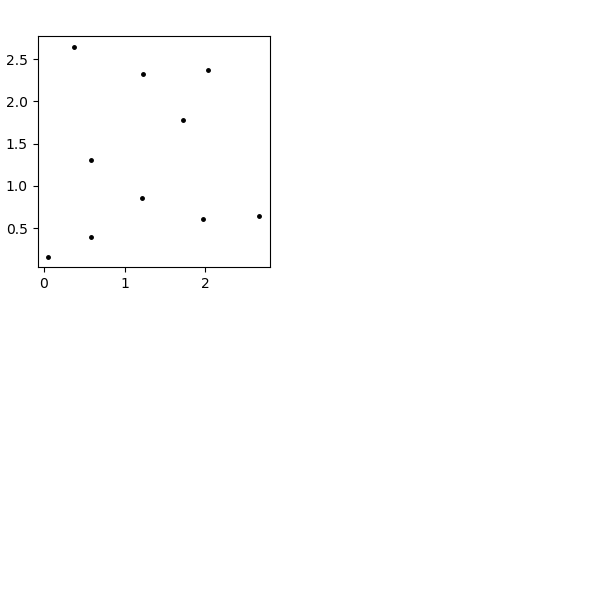

NameError: name 'foodx' is not defined

In [5]:
#Main program
c = Const();
np.random.seed(1)
curve  = model(c, show_dotses=True);
plt.figure();
plt.plot(curve);